In [3]:
%matplotlib inline

In [4]:
import os
import json
import csv
import matplotlib
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

In [9]:
def preData(city, category):
    business_abspath = os.path.abspath("../data/business.csv")
    df = pd.read_csv(business_abspath)
    df['score'] = df['stars'] * df['review_count']
    df['categories'] = df['categories'].apply(lambda s:[i.strip() for i in s.split('[')[-1].split(']')[0].replace('\'','').split(',')])

    # category = 'Bars'
    # city = df['city'][999]

    if category:
        df_city = df[(df['city'] == city) & (df['categories'].apply(lambda x: category in x))].sort_values(by='score', ascending=False)
    else:
        df_city = df[(df['city'] == city)].sort_values(by='score', ascending=False)
    
    return df_city


def plot_result(city='Pittsburgh', category='Bars'):
    fig = plt.figure(figsize=(15,10))
    ax = plt.subplot(111)
    df_city = preData(city,category)
    address = []
    name=[]
    for i in df_city['full_address'].values[0:5]:
        address.append(i)
    for i in df_city['name'].values[0:5]:
        name.append(i)
    show = "\n\n".join([(a + ":\n" + b) for a, b in zip(name, address)])
    state = df_city[df_city['city']==city]['state'].unique()[0]
    max_score = df_city['score'].values[0]
    rows=df_city.shape[0]
    if rows < 15:
        x_axis=np.arange(rows)
        Y_score = df_city['score'].values
        X_name = df_city['name'].values
    else:
        x_axis=np.arange(15)
        Y_score = df_city['score'][:15].values
        X_name = df_city['name'][:15].values

    rect = ax.bar(x_axis, Y_score,linewidth=1.0, linestyle="-",align='center', alpha=0.8)
    for v, i in enumerate(Y_score):
        ax.text(v-0.4, i+1, i, fontweight='bold')
    ax.annotate(show, xy=(0.8, 0.35), xycoords='axes fraction',fontsize="small")
    ticks = ax.set_xticks(x_axis)
    labels = ax.set_xticklabels(X_name, rotation=45, fontsize='small')
    ax.set_title("{} Ranking in {} {}".format(category,city,state), x=0.5, y=0.9, fontsize=25)
    ax.set_xlabel('Business Name', fontsize=15)
    ax.set_ylabel('Score (Avg_rate*Review_number)',fontsize=15)
    ax.set_ylim([0, max_score*1.1])
    ax.margins(x=0.05)
    plt.show()

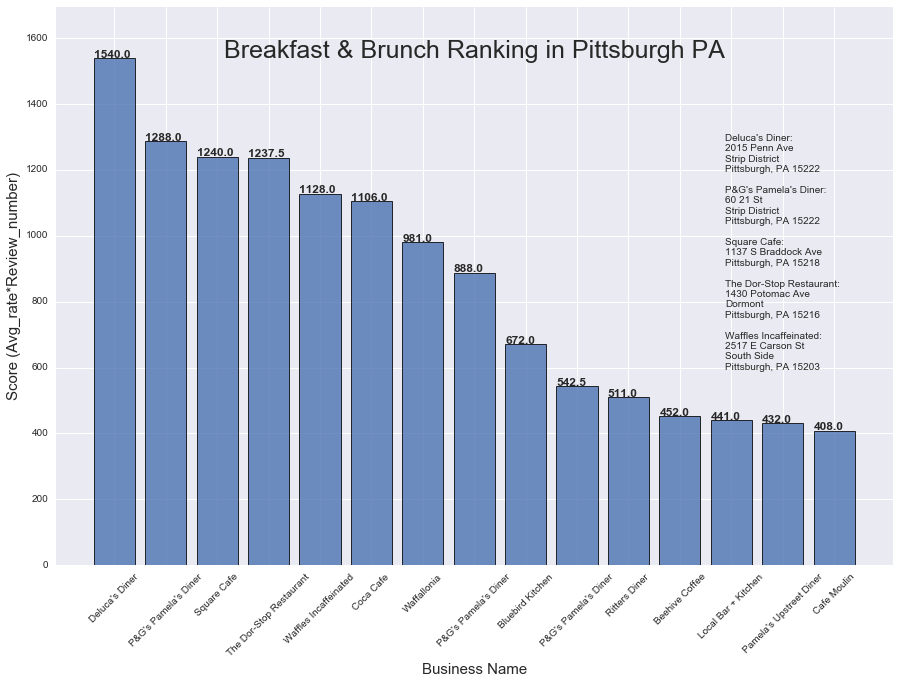

In [10]:
plot_result(city='Pittsburgh', category='Breakfast & Brunch')